## IMPORTING LIBRARYS

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import fetch_california_housing 
from mpl_toolkits.basemap import Basemap
import plotly.express as px

## GETTING DATA

In [2]:
pure_data= fetch_california_housing()  
df=pd.DataFrame(data=pure_data.data,columns=pure_data.feature_names) 
df['MedHouseVal']=pure_data.target 
df=df.sample(frac=1) 
df 
X=df.drop(columns=['MedHouseVal'],axis=1)
y=df['MedHouseVal'] 
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19030,6.0767,16.0,5.572414,0.944828,371.0,2.558621,38.38,-122.02,2.164
19288,3.9688,17.0,5.163934,0.963934,1857.0,3.044262,38.41,-122.75,1.650
3192,3.2019,33.0,6.128571,1.019048,580.0,2.761905,36.34,-119.72,1.125
13223,4.7056,20.0,5.904138,0.973103,4861.0,3.352414,34.03,-117.67,1.655
18992,4.9450,11.0,6.661972,1.007042,1331.0,3.124413,38.41,-122.00,2.984
...,...,...,...,...,...,...,...,...,...
9812,4.0154,33.0,5.211161,1.030166,1704.0,2.570136,36.60,-121.93,2.257
19312,3.4471,31.0,5.326389,1.013889,716.0,2.486111,38.44,-122.86,2.095
20,1.3578,40.0,4.524096,1.108434,409.0,2.463855,37.85,-122.27,1.475
127,6.0194,44.0,5.735343,1.000000,1358.0,2.274707,37.84,-122.21,2.923


In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19030,6.0767,16.0,5.572414,0.944828,371.0,2.558621,38.38,-122.02
19288,3.9688,17.0,5.163934,0.963934,1857.0,3.044262,38.41,-122.75
3192,3.2019,33.0,6.128571,1.019048,580.0,2.761905,36.34,-119.72
13223,4.7056,20.0,5.904138,0.973103,4861.0,3.352414,34.03,-117.67
18992,4.9450,11.0,6.661972,1.007042,1331.0,3.124413,38.41,-122.00
...,...,...,...,...,...,...,...,...
9812,4.0154,33.0,5.211161,1.030166,1704.0,2.570136,36.60,-121.93
19312,3.4471,31.0,5.326389,1.013889,716.0,2.486111,38.44,-122.86
20,1.3578,40.0,4.524096,1.108434,409.0,2.463855,37.85,-122.27
127,6.0194,44.0,5.735343,1.000000,1358.0,2.274707,37.84,-122.21


In [4]:
y

19030    2.164
19288    1.650
3192     1.125
13223    1.655
18992    2.984
         ...  
9812     2.257
19312    2.095
20       1.475
127      2.923
17595    2.352
Name: MedHouseVal, Length: 20640, dtype: float64

In [5]:
df = pd.concat([X,y],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19030,6.0767,16.0,5.572414,0.944828,371.0,2.558621,38.38,-122.02,2.164
19288,3.9688,17.0,5.163934,0.963934,1857.0,3.044262,38.41,-122.75,1.650
3192,3.2019,33.0,6.128571,1.019048,580.0,2.761905,36.34,-119.72,1.125
13223,4.7056,20.0,5.904138,0.973103,4861.0,3.352414,34.03,-117.67,1.655
18992,4.9450,11.0,6.661972,1.007042,1331.0,3.124413,38.41,-122.00,2.984
...,...,...,...,...,...,...,...,...,...
9812,4.0154,33.0,5.211161,1.030166,1704.0,2.570136,36.60,-121.93,2.257
19312,3.4471,31.0,5.326389,1.013889,716.0,2.486111,38.44,-122.86,2.095
20,1.3578,40.0,4.524096,1.108434,409.0,2.463855,37.85,-122.27,1.475
127,6.0194,44.0,5.735343,1.000000,1358.0,2.274707,37.84,-122.21,2.923


## VISUALIZING DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 19030 to 17595
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19030,6.0767,16.0,5.572414,0.944828,371.0,2.558621,38.38,-122.02,2.164
19288,3.9688,17.0,5.163934,0.963934,1857.0,3.044262,38.41,-122.75,1.650
3192,3.2019,33.0,6.128571,1.019048,580.0,2.761905,36.34,-119.72,1.125
13223,4.7056,20.0,5.904138,0.973103,4861.0,3.352414,34.03,-117.67,1.655
18992,4.9450,11.0,6.661972,1.007042,1331.0,3.124413,38.41,-122.00,2.984


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### distribution of target values

/tmp/ipykernel_15922/3098026193.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig=sns.displot(y,palette='pastel')


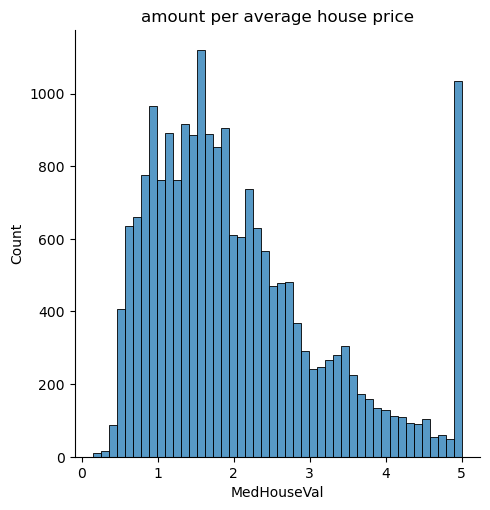

In [10]:
fig=sns.displot(y,palette='pastel') 
plt.title('amount per average house price')  
plt.savefig('./images/distribution-calhousing.png')
plt.show() 

### showing heat map of correlation matrix 

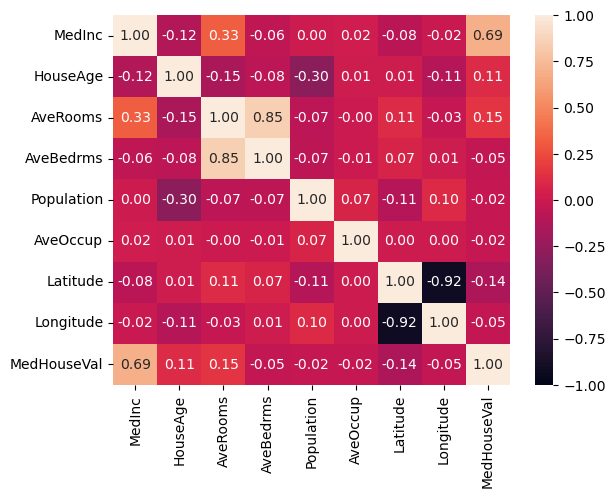

In [11]:
sns.heatmap(data=df.corr(),annot=True, fmt=".2f",mask=None,vmin=-1.0, vmax=1.0)  
plt.savefig('./images/correlation-heat-map.png')
plt.show()

### showing average house price per region

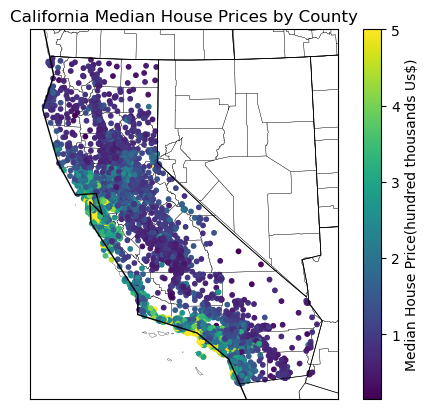

In [12]:
m = Basemap(
    projection='lcc',
    resolution='c',
    lat_0=37.5, lon_0=-119,
    width=1E6, height=1.2E6
)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawcounties(linewidth=0.2) 

m.scatter(df['Longitude'], df['Latitude'], latlon=True, c=df['MedHouseVal'], cmap='viridis', marker='o', s=10)

plt.colorbar(label='Median House Price(hundred thousands Us$)')

plt.title('California Median House Prices by County')
plt.savefig('./images/medianhouseval-geomap.png')
plt.show()

#### interactive

### reducing dimensions to see scatterplot with tsne

In [13]:
from sklearn.manifold import TSNE
df_tsne_sample=df.sample(frac=0.2) 
X_tsne_sample=df_tsne_sample.drop(columns=['MedHouseVal']) 
y_tsne_sample=df_tsne_sample['MedHouseVal']
tsne=TSNE(n_components=1,random_state=200)  #we apply the random state so that its not different everytime we restar 
array_red=tsne.fit_transform(X_tsne_sample) #applying dimensional reductioon on array  
df_tsne=pd.DataFrame(array_red,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_tsne = df_tsne.reset_index(drop=True)
y_tsne_sample = y_tsne_sample.reset_index(drop=True)
df_tsne

,COMP1
0,-41.025566
1,98.816162
2,108.154083
3,-11.866969
4,-56.957329
...,...
4123,-40.098248
4124,131.269653
4125,31.732380
4126,6.148953


In [14]:
df_tsne['target']=y_tsne_sample
df_tsne

,COMP1,target
0,-41.025566,0.81400
1,98.816162,1.84800
2,108.154083,1.75000
3,-11.866969,2.70700
4,-56.957329,5.00001
...,...,...
4123,-40.098248,4.74600
4124,131.269653,1.32600
4125,31.732380,0.61200
4126,6.148953,2.02100


In [15]:
array_red

array([[-41.025566],
       [ 98.81616 ],
       [108.15408 ],
       ...,
       [ 31.73238 ],
       [  6.148953],
       [-52.075977]], dtype=float32)

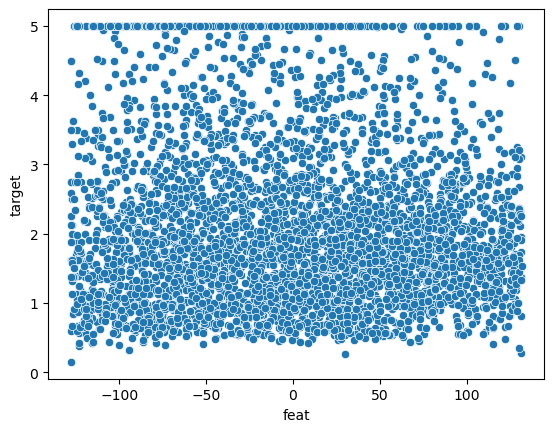

In [16]:
sns.scatterplot(data=df_tsne,x='COMP1',y='target') 
plt.xlabel("feat") 
plt.ylabel("target") 
plt.savefig('./images/dimension-reduction-tsne.png')
plt.show() 

### using dimensiality reduction with PCA

In [17]:
from sklearn.decomposition import PCA   
df_pca_sample=df.sample(frac=0.2) 
X_pca_sample=df_pca_sample.drop(columns=['MedHouseVal']) 
y_pca_sample=df_pca_sample['MedHouseVal']
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X_pca_sample) 
df_pca=pd.DataFrame(arrayFeat,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_pca = df_pca.reset_index(drop=True)
y_pca_sample = y_pca_sample.reset_index(drop=True)
df_pca 

,COMP1
0,-930.098627
1,-705.053690
2,-532.063114
3,-1194.111323
4,552.969003
...,...
4123,44.917639
4124,2442.992965
4125,536.868290
4126,-462.033290


In [18]:
df_pca['target']=y_pca_sample 
df_pca

,COMP1,target
0,-930.098627,1.86200
1,-705.053690,1.33600
2,-532.063114,0.93500
3,-1194.111323,3.18800
4,552.969003,2.23300
...,...,...
4123,44.917639,1.30900
4124,2442.992965,2.73200
4125,536.868290,1.85600
4126,-462.033290,1.05700


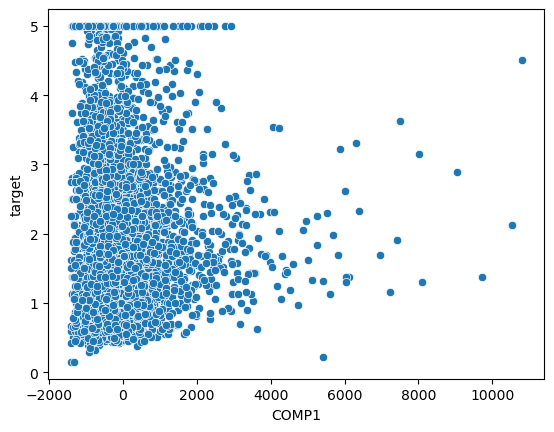

In [19]:
sns.scatterplot(data=df_pca,x='COMP1',y='target')
plt.savefig('./images/dimension-reduction-pca.png')
plt.show()

## SPLITTING DATA

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [21]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11798,4.4958,19.0,5.899767,1.074592,1206.0,2.811189,38.92,-121.22
10327,7.3681,13.0,7.584034,1.158263,2061.0,2.886555,33.85,-117.77
2472,2.4474,19.0,5.200426,0.985075,1416.0,3.019190,36.45,-119.86
13401,3.6417,16.0,5.760820,1.099089,3388.0,3.858770,34.13,-117.45
2139,2.5737,30.0,4.685328,0.930502,1375.0,2.654440,36.77,-119.74
...,...,...,...,...,...,...,...,...
6176,4.1250,36.0,5.587500,0.990625,1139.0,3.559375,34.08,-117.93
7713,4.0000,31.0,4.990521,1.090047,686.0,3.251185,33.95,-118.15
14415,3.4306,18.0,4.826996,1.171103,964.0,1.832700,32.79,-117.24
3778,3.3545,24.0,4.254021,1.037534,2945.0,1.973861,34.17,-118.40


In [22]:
y_train

11798    1.926
10327    3.531
2472     0.756
13401    1.190
2139     0.769
         ...  
6176     1.858
7713     2.632
14415    2.750
3778     2.215
270      2.250
Name: MedHouseVal, Length: 16512, dtype: float64

In [23]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2866,2.4919,17.0,5.607812,1.095312,1746.0,2.728125,35.37,-118.92
20520,2.1213,35.0,3.916667,0.955357,732.0,2.178571,38.58,-121.53
20456,4.7574,10.0,4.978979,0.930931,1053.0,3.162162,34.27,-118.77
14040,2.1937,20.0,3.625767,1.162577,678.0,2.079755,32.75,-117.14
8156,4.3750,37.0,5.241791,1.029851,836.0,2.495522,33.82,-118.11
...,...,...,...,...,...,...,...,...
6946,3.6196,38.0,4.964602,0.967552,1369.0,4.038348,33.99,-118.08
16839,5.7653,21.0,6.196926,1.017291,6160.0,2.958694,37.59,-122.46
14453,2.9306,41.0,4.522293,1.076433,640.0,2.038217,32.84,-117.28
985,5.6417,13.0,6.760000,1.063590,4847.0,2.485641,37.66,-121.84


In [24]:
y_test

2866     0.757
20520    0.792
20456    2.099
14040    1.625
8156     2.182
         ...  
6946     1.707
16839    3.258
14453    3.603
985      3.529
4002     4.190
Name: MedHouseVal, Length: 4128, dtype: float64

## CREATING MODEL 

In [25]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor


In [26]:
# model=DecisionTreeRegressor() 

In [27]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 
from sklearn.cross_decomposition import PLSCanonical,PLSRegression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor  
from xgboost import XGBRegressor
def getModels(): 
   return {"LINEAR REGRESSION":LinearRegression(), 
    "RANDOM FOREST":RandomForestRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=8,n_estimators=200),
    "ADA BOOST":AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50), 
    "DECISION TREE":DecisionTreeRegressor(), 
    "SGD":make_pipeline(StandardScaler(),SGDRegressor(alpha= 0.01,eta0= 0.1,learning_rate= 'optimal',loss= 'epsilon_insensitive',max_iter= 100,penalty= 'l1',tol= 0.01)), 
    "KNN":KNeighborsRegressor(algorithm= 'ball_tree', leaf_size= 30, n_neighbors= 10, p= 1, weights= 'distance'),
    "EXTRA TREES":ExtraTreesRegressor(random_state=0,max_depth=6),
    "GRADIENT BOOST":GradientBoostingRegressor(random_state=0) , 
    "XGREGRESSOR":XGBRegressor(colsample_bytree= 0.8,gamma= 0,learning_rate= 0.1,max_depth= 7,n_estimators= 200,reg_alpha= 1,reg_lambda= 10,subsample= 1.0)}

## TRAINING MODEL

In [28]:
# model.fit(X_train,y_train)

In [29]:
models=getModels() 
for i in models.keys(): 
    models[i].fit(X_train,y_train)

""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

print('models loaded') 
models

models loaded


{'LINEAR REGRESSION': LinearRegression(),
 'RANDOM FOREST': RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200),
 'ADA BOOST': AdaBoostRegressor(learning_rate=0.1, loss='exponential'),
 'DECISION TREE': DecisionTreeRegressor(),
 'SGD': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor',
                  SGDRegressor(alpha=0.01, eta0=0.1, learning_rate='optimal',
                               loss='epsilon_insensitive', max_iter=100,
                               penalty='l1', tol=0.01))]),
 'KNN': KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, p=1,
                     weights='distance'),
 'EXTRA TREES': ExtraTreesRegressor(max_depth=6, random_state=0),
 'GRADIENT BOOST': GradientBoostingRegressor(random_state=0),
 'XGREGRESSOR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsampl

## PREDICTING

In [30]:
scores={} 
predictions={} 
rmse={}  
mse={} 
metrics={}
from sklearn.metrics import mean_squared_error 
for i in models.keys():  
    predictions[i]=models[i].predict(X_test) 
    rmse[i]=mean_squared_error(y_test,predictions[i],squared=True)  
    mse[i]=mean_squared_error(y_test,predictions[i],squared=False) 
    metrics[i]={'MSE':mse[i],'RMSE':rmse[i]}
    scores[i]=rmse[i]


""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

with open('./results/results.txt', 'w') as file:
    # Iterate over dictionary items and write them to the file
    for key, value in metrics.items():
        file.write(f'{key}: {value}\n')
metrics 

{'LINEAR REGRESSION': {'MSE': 0.7538506876931093, 'RMSE': 0.5682908593353737},
 'RANDOM FOREST': {'MSE': 0.5545174498256673, 'RMSE': 0.3074896021611615},
 'ADA BOOST': {'MSE': 0.7474763251497256, 'RMSE': 0.5587208566593383},
 'DECISION TREE': {'MSE': 0.720397101888013, 'RMSE': 0.5189719844086482},
 'SGD': {'MSE': 1.3957515104427838, 'RMSE': 1.9481222789033124},
 'KNN': {'MSE': 0.9890454711709039, 'RMSE': 0.9782109440436753},
 'EXTRA TREES': {'MSE': 0.7578316256953427, 'RMSE': 0.5743087729040459},
 'GRADIENT BOOST': {'MSE': 0.5367976518618077, 'RMSE': 0.2881517190443505},
 'XGREGRESSOR': {'MSE': 0.44829140052735633, 'RMSE': 0.20096517978677864}}

### getting best parameter for models

#### RANDOM FOREST

In [31]:
# uncomment if you want to find the best parameters for random forest(takes a long long time)
# param_grid = {
#     'n_estimators': [50, 100,200],
#     'max_depth': [5,6,8,9],
#     'min_samples_split': [4,5,8,10],s
#     'min_samples_leaf': [2, 4,6]
# }
# rf = RandomForestRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('grid_search_results.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### ADABOOST

In [32]:
# uncomment if you wanna know the best params for adaboost
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],  
#     'loss':['linear', 'square', 'exponential']
# }
# adaboost = AdaBoostRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/adaboost-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### KNN 

In [33]:
# uncomment if you wanna know the best params for knn
# param_grid = {
#     'n_neighbors': [3, 5, 7, 10],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2], 
#     'algorithm':['ball_tree', 'kd_tree', 'brute'], 
#     'leaf_size':[30,15,7,40,60,5]
# }
# knn = KNeighborsRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/knn-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### SGD

In [34]:
# uncomment if you wanna know the best params for sgd
# param_grid = {
#     'sgdregressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
#     'sgdregressor__penalty': ['l1', 'l2', 'elasticnet'],
#     'sgdregressor__alpha': [0.0001, 0.001, 0.01],
#     'sgdregressor__learning_rate': ['constant', 'optimal', 'invscaling'],
#     'sgdregressor__eta0': [0.01, 0.1, 0.5],
#     'sgdregressor__tol': [1e-4, 1e-3, 1e-2],
#     'sgdregressor__max_iter': [100, 500, 1000]  
# }
# pipe = make_pipeline(StandardScaler(), SGDRegressor())

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/svg-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### XGBOOSTER

In [35]:
# uncomment if you wanna know the best params for xgbooster(takes a REALLY long time)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 1, 5],
#     'reg_alpha': [0, 1, 10],
#     'reg_lambda': [0, 1, 10]
# }
# xgb_reg = XGBRegressor()
# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/xgbooster-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

### comparing each model

In [36]:
# plt.scatter(y_test, y_pred,edgecolor='black')
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions in Regression")
# plt.show()

['LINEAR REGRESSION', 'RANDOM FOREST', 'ADA BOOST', 'DECISION TREE', 'SGD', 'KNN', 'EXTRA TREES', 'GRADIENT BOOST', 'XGREGRESSOR']
9


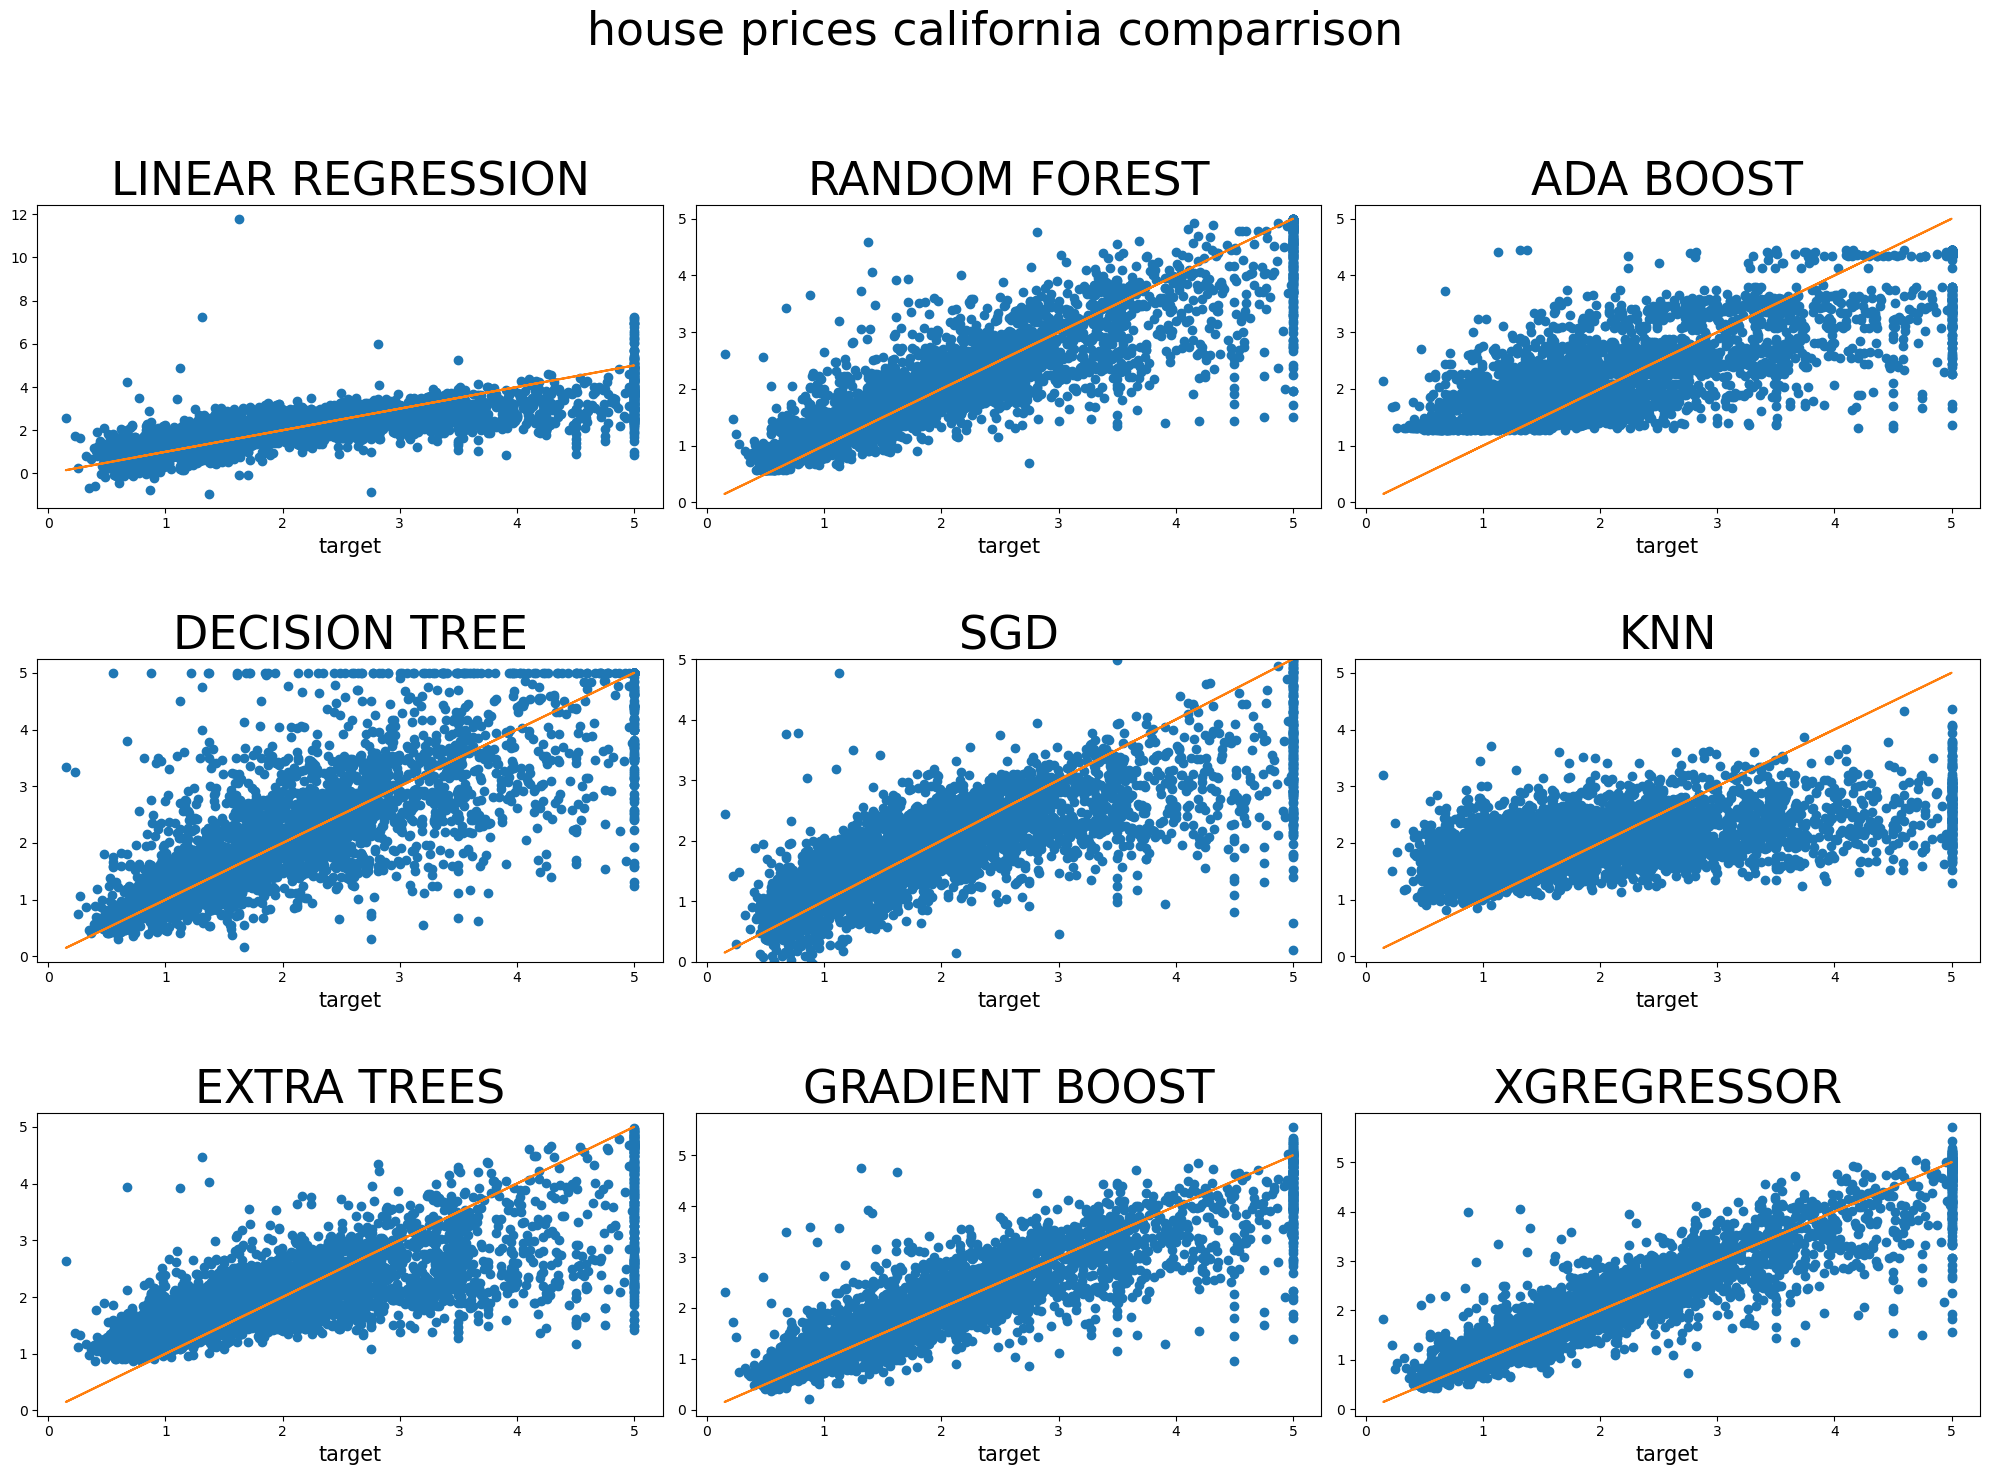

In [37]:
auxdic=scores
auxdic=list(auxdic.items())

fig,ax =plt.subplots(3,3) 
fig.suptitle("house prices california comparrison",size=33)   
fig.set_figwidth(20)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
for i in predictions.keys():
    predictionsList.append(predictions[i]) 
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  

#print(predictions)
#predictions=np.transpose(pd.DataFrame(predictions)) 
m_keys=list(models.keys()) 
print(m_keys) 
print(len(m_keys))
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j  
        ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        ax[i,j].set_xlabel("target",size=15) 
        ax[i,j].set_xbound(lower=0,upper=10)
        if m_keys[oneDIndex] == 'SGD': 
            ax[i,j].set_ybound(lower=0,upper=12) 
            ax[i,j].set_ylim(0,5) 
        m,b=np.polyfit(y_test,y_test,deg=1)
        ax[i,j].plot(y_test,m*y_test+b)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center")
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5) 
plt.savefig('./images/model-comparrison.png')

In [38]:
# residuals = y_test - y_pred
# plt.hist(residuals, bins=50)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in Regression")
# plt.show()

In [39]:
# plt.plot(y_test, label='True Values')
# plt.plot(y_pred, label='Predictions')
# plt.xlabel("Sample Index")
# plt.ylabel("Values")
# plt.title("True Values vs Predictions Across Samples")
# plt.legend()
# plt.show()